<a href="https://colab.research.google.com/github/Rongxuan-Zhou/CS6120_project/blob/index_construction-%26-hybrid_retrieval/notebooks/1_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MSMARCO v1.1 Data Exploration

This notebook explores the MS MARCO dataset v1.1, which is a large-scale information retrieval dataset used for text ranking and question answering tasks.

Through this notebook, we will:
1. Load the MSMARCO dataset
2. Explore basic features and statistics of the data
3. Analyze text length distribution
4. Perform data visualization
5. Check memory optimization strategies

In [1]:
# 1. Environment Setup
!pip install -q pandas matplotlib seaborn datasets psutil requests
from google.colab import drive
drive.mount('/content/drive')

# Copy project source code to Colab
import os
import shutil
import sys
PROJECT_PATH = "/content/drive/MyDrive/CS6120_project"
SRC_PATH = os.path.join(PROJECT_PATH, "src")
if os.path.exists(SRC_PATH):
    shutil.copytree(SRC_PATH, "/content/src")
    sys.path.append("/content")
    print("Successfully copied src directory to Colab")
else:
    # If source directory doesn't exist, create basic structure
    os.makedirs(PROJECT_PATH, exist_ok=True)
    os.makedirs(os.path.join(PROJECT_PATH, "data"), exist_ok=True)
    os.makedirs(os.path.join(PROJECT_PATH, "src"), exist_ok=True)
    print(f"Created basic project structure at {PROJECT_PATH}")

# Memory monitoring
import psutil
print(f"Available memory: {psutil.virtual_memory().available/1024**3:.2f} GB")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-c

In [2]:
# 2. MSMARCO Dataset Loading
import pandas as pd
import numpy as np
from datasets import load_dataset

try:
    # Try to load DataPreprocessor class if it exists
    try:
        from src.data_preparation import DataPreprocessor
        preprocessor = DataPreprocessor()
    except ImportError:
        print("Could not import DataPreprocessor, will process data directly")

    print("Attempting to load MSMARCO dataset...")

    # Load MSMARCO v1.1 dataset
    msmarco = load_dataset("ms_marco", "v1.1")
    print(f"Successfully loaded MSMARCO v1.1")

    # View basic dataset information
    print("\nMSMARCO dataset structure:")
    print(msmarco)

    # Take samples for analysis to avoid processing the entire dataset
    sample_size = 10000
    docs = []
    for doc in msmarco['train'].select(range(sample_size)):
        if 'passages' in doc and 'passage_text' in doc['passages'] and len(doc['passages']['passage_text']) > 0:
            docs.append({
                'text': doc['passages']['passage_text'][0],
                'length': len(doc['passages']['passage_text'][0])
            })

    msmarco_df = pd.DataFrame(docs)
    print(f"\nSample size: {len(msmarco_df)} records")
    print(f"\nMSMARCO Statistics:\n{msmarco_df.describe()}")

    # Display a few examples
    print("\nText examples:")
    for idx, row in msmarco_df.head(3).iterrows():
        print(f"Text {idx+1} (length {row['length']}): {row['text'][:100]}...")

except Exception as e:
    print(f"Failed to load MSMARCO: {e}")
    # Create empty dataframe as fallback
    msmarco_df = pd.DataFrame(columns=['text', 'length'])
    print("Created empty dataframe as fallback")

Attempting to load MSMARCO dataset...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.48k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/175M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

Generating validation split:   0%|          | 0/10047 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/82326 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/9650 [00:00<?, ? examples/s]

Successfully loaded MSMARCO v1.1

MSMARCO dataset structure:
DatasetDict({
    validation: Dataset({
        features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
        num_rows: 10047
    })
    train: Dataset({
        features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
        num_rows: 82326
    })
    test: Dataset({
        features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
        num_rows: 9650
    })
})

Sample size: 10000 records

MSMARCO Statistics:
             length
count  10000.000000
mean     413.868500
std      147.925227
min       56.000000
25%      288.000000
50%      410.000000
75%      538.000000
max     1167.000000

Text examples:
Text 1 (length 491): Since 2007, the RBA's outstanding reputation has been affected by the 'Securency' or NPA scandal. Th...
Text 2 (length 440): In his younger years, Ronald Reagan was a member of the Democratic Party an

In [3]:
# 3. Query Analysis (if available)
try:
    # Check if query data is available
    if 'queries' in msmarco['train'].features:
        # Get query samples
        queries = []
        for doc in msmarco['train'].select(range(sample_size)):
            if 'query' in doc:
                queries.append({
                    'query': doc['query'],
                    'length': len(doc['query'])
                })

        query_df = pd.DataFrame(queries)
        print(f"\nQuery sample size: {len(query_df)} records")
        print(f"\nQuery statistics:\n{query_df.describe()}")

        # Display a few query examples
        print("\nQuery examples:")
        for idx, row in query_df.head(5).iterrows():
            print(f"Query {idx+1} (length {row['length']}): {row['query']}")
    else:
        print("\nQuery data not available or stored in a different location")
except Exception as e:
    print(f"\nFailed to load queries: {e}")


Query data not available or stored in a different location


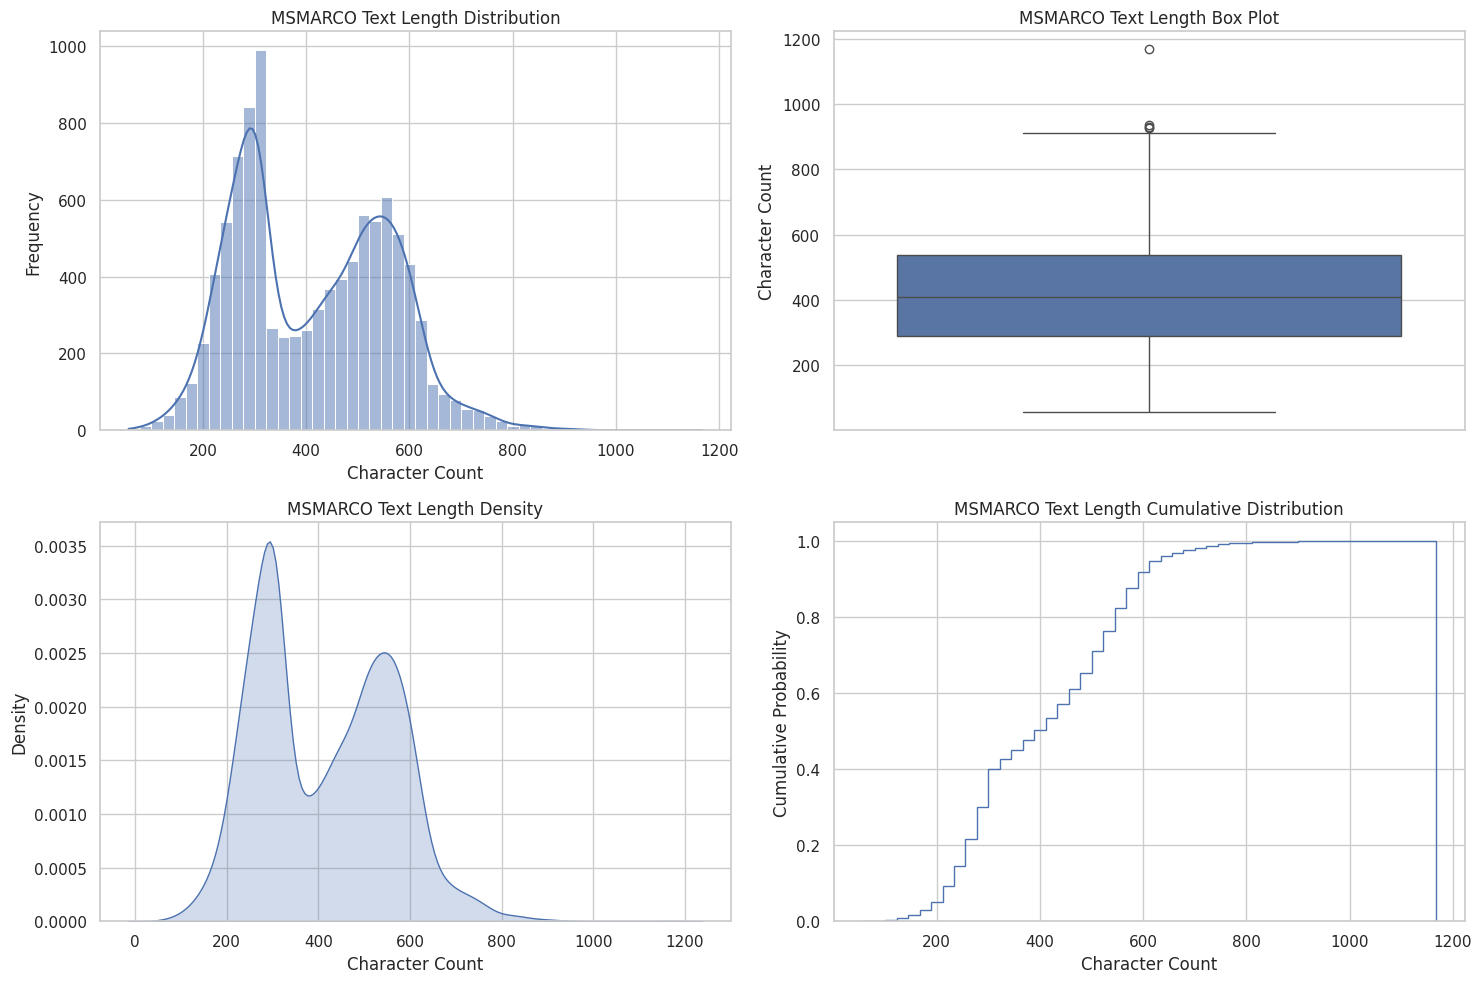

In [4]:
# 4. Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# 4.1 Text Length Distribution
plt.subplot(2, 2, 1)
sns.histplot(msmarco_df['length'], bins=50, kde=True)
plt.title('MSMARCO Text Length Distribution')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

# 4.2 Text Length Box Plot
plt.subplot(2, 2, 2)
sns.boxplot(y=msmarco_df['length'])
plt.title('MSMARCO Text Length Box Plot')
plt.ylabel('Character Count')

# 4.3 Text Length Kernel Density Estimation
plt.subplot(2, 2, 3)
sns.kdeplot(msmarco_df['length'], fill=True)
plt.title('MSMARCO Text Length Density')
plt.xlabel('Character Count')
plt.ylabel('Density')

# 4.4 Text Length Cumulative Distribution
plt.subplot(2, 2, 4)
plt.hist(msmarco_df['length'], bins=50, density=True, cumulative=True, histtype='step')
plt.title('MSMARCO Text Length Cumulative Distribution')
plt.xlabel('Character Count')
plt.ylabel('Cumulative Probability')
plt.grid(True)

plt.tight_layout()
plt.show()

# Query length analysis (if available)
try:
    if 'query_df' in locals() and len(query_df) > 0:
        plt.figure(figsize=(15, 5))

        # Query length distribution
        plt.subplot(1, 2, 1)
        sns.histplot(query_df['length'], bins=30, kde=True)
        plt.title('MSMARCO Query Length Distribution')
        plt.xlabel('Character Count')
        plt.ylabel('Frequency')

        # Query length box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=query_df['length'])
        plt.title('MSMARCO Query Length Box Plot')
        plt.ylabel('Character Count')

        plt.tight_layout()
        plt.show()
except NameError:
    print("Query data not available, skipping query visualization")

Word Statistics:
Word Count Statistics:
count    10000.000000
mean        69.666900
std         25.766023
min          8.000000
25%         48.000000
50%         68.000000
75%         90.000000
max        201.000000
Name: word_count, dtype: float64

Average Word Length Statistics:
count    10000.000000
mean         5.005133
std          0.589967
min          2.663102
25%          4.603774
50%          4.963636
75%          5.352440
max         10.411765
Name: avg_word_length, dtype: float64


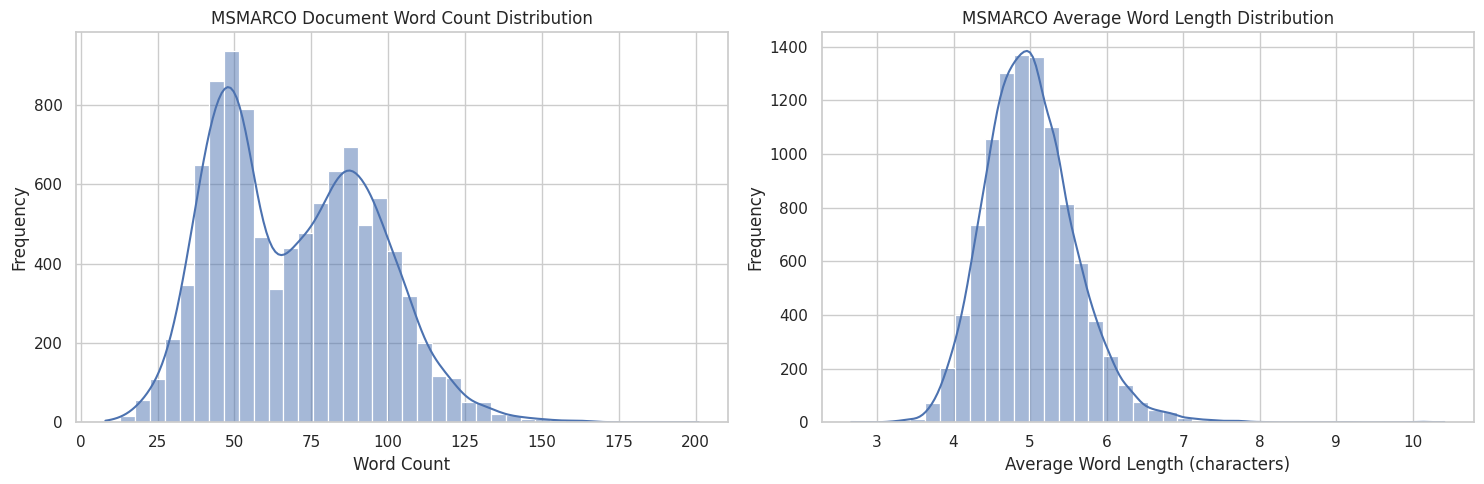

In [5]:
# 5. Word Length Analysis
# Calculate average word length and word count for each document
def analyze_text_words(text):
    if not isinstance(text, str) or not text.strip():
        return {'word_count': 0, 'avg_word_length': 0}

    words = text.split()
    word_count = len(words)
    if word_count == 0:
        return {'word_count': 0, 'avg_word_length': 0}

    total_length = sum(len(word) for word in words)
    avg_length = total_length / word_count
    return {'word_count': word_count, 'avg_word_length': avg_length}

try:
    if len(msmarco_df) > 0:
        word_analysis = [analyze_text_words(text) for text in msmarco_df['text']]
        msmarco_df['word_count'] = [item['word_count'] for item in word_analysis]
        msmarco_df['avg_word_length'] = [item['avg_word_length'] for item in word_analysis]

        # Display word statistics
        print("Word Statistics:")
        print(f"Word Count Statistics:\n{msmarco_df['word_count'].describe()}")
        print(f"\nAverage Word Length Statistics:\n{msmarco_df['avg_word_length'].describe()}")

        # Visualization
        plt.figure(figsize=(15, 5))

        # Word count distribution
        plt.subplot(1, 2, 1)
        sns.histplot(msmarco_df['word_count'], bins=40, kde=True)
        plt.title('MSMARCO Document Word Count Distribution')
        plt.xlabel('Word Count')
        plt.ylabel('Frequency')

        # Average word length distribution
        plt.subplot(1, 2, 2)
        sns.histplot(msmarco_df['avg_word_length'], bins=40, kde=True)
        plt.title('MSMARCO Average Word Length Distribution')
        plt.xlabel('Average Word Length (characters)')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()
except Exception as e:
    print(f"Word analysis failed: {e}")

In [6]:
# 6. Memory Optimization Check
def check_memory_usage(df, name):
    if len(df) == 0:
        print(f"{name} is empty, no memory usage")
        return

    mem_usage = df.memory_usage(deep=True).sum() / 1024**2
    print(f"{name} memory usage: {mem_usage:.2f} MB")

    # Check memory usage for each column
    print(f"\n{name} column memory usage:")
    for col in df.columns:
        col_mem = df[col].memory_usage(deep=True) / 1024**2
        print(f"- {col}: {col_mem:.2f} MB")

    # Memory optimization suggestions
    print("\nOptimization suggestions:")

    # Check numeric columns
    for col in df.select_dtypes(include=['int', 'float']).columns:
        current_type = df[col].dtype
        min_val = df[col].min()
        max_val = df[col].max()

        # Recommend appropriate data type for integer columns
        if pd.api.types.is_integer_dtype(current_type):
            if min_val >= 0:
                if max_val < 256:
                    suggested_type = 'uint8'
                elif max_val < 65536:
                    suggested_type = 'uint16'
                else:
                    suggested_type = 'uint32'
            else:
                if min_val > -128 and max_val < 128:
                    suggested_type = 'int8'
                elif min_val > -32768 and max_val < 32768:
                    suggested_type = 'int16'
                else:
                    suggested_type = 'int32'

            if current_type != suggested_type:
                print(f"Column '{col}' can be converted from {current_type} to {suggested_type}")

    # Check if text columns can be categorized
    for col in df.select_dtypes(include=['object']).columns:
        unique_count = df[col].nunique()
        if unique_count < len(df) * 0.5:  # If unique values are less than 50% of total rows
            print(f"Column '{col}' could be converted to category type (unique values: {unique_count})")

# Check MSMARCO dataframe
check_memory_usage(msmarco_df, "MSMARCO")

# Perform some optimizations to demonstrate effect
if len(msmarco_df) > 0:
    # Optimize integer columns
    for col in msmarco_df.select_dtypes(include=['int']).columns:
        if msmarco_df[col].min() >= 0:
            if msmarco_df[col].max() < 256:
                msmarco_df[col] = msmarco_df[col].astype('uint8')
            elif msmarco_df[col].max() < 65536:
                msmarco_df[col] = msmarco_df[col].astype('uint16')

    # Display optimization results
    print("\nAfter applying optimizations:")
    check_memory_usage(msmarco_df, "Optimized MSMARCO")

MSMARCO memory usage: 5.67 MB

MSMARCO column memory usage:
- text: 5.44 MB
- length: 0.08 MB
- word_count: 0.08 MB
- avg_word_length: 0.08 MB

Optimization suggestions:
Column 'length' can be converted from int64 to uint16
Column 'word_count' can be converted from int64 to uint8

After applying optimizations:
Optimized MSMARCO memory usage: 6.60 MB

Optimized MSMARCO column memory usage:
- text: 6.49 MB
- length: 0.02 MB
- word_count: 0.01 MB
- avg_word_length: 0.08 MB

Optimization suggestions:


Additional Text Feature Statistics:
Sentence Count Statistics:
count    10000.000000
mean         5.719300
std          2.563896
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         36.000000
Name: sentence_count, dtype: float64

Question Mark Count Statistics:
count    10000.000000
mean         0.022400
std          0.228262
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: question_mark_count, dtype: float64

Numeric Character Statistics:
count    10000.000000
mean         6.068500
std          9.181995
min          0.000000
25%          0.000000
50%          2.000000
75%          8.000000
max         93.000000
Name: number_count, dtype: float64

Average Sentence Length Statistics:
count    10000.000000
mean        80.327103
std         40.950820
min         15.000000
25%         60.200000
50%         75.333333
75%         92.600000
max        683.000000
Name: avg_sentence

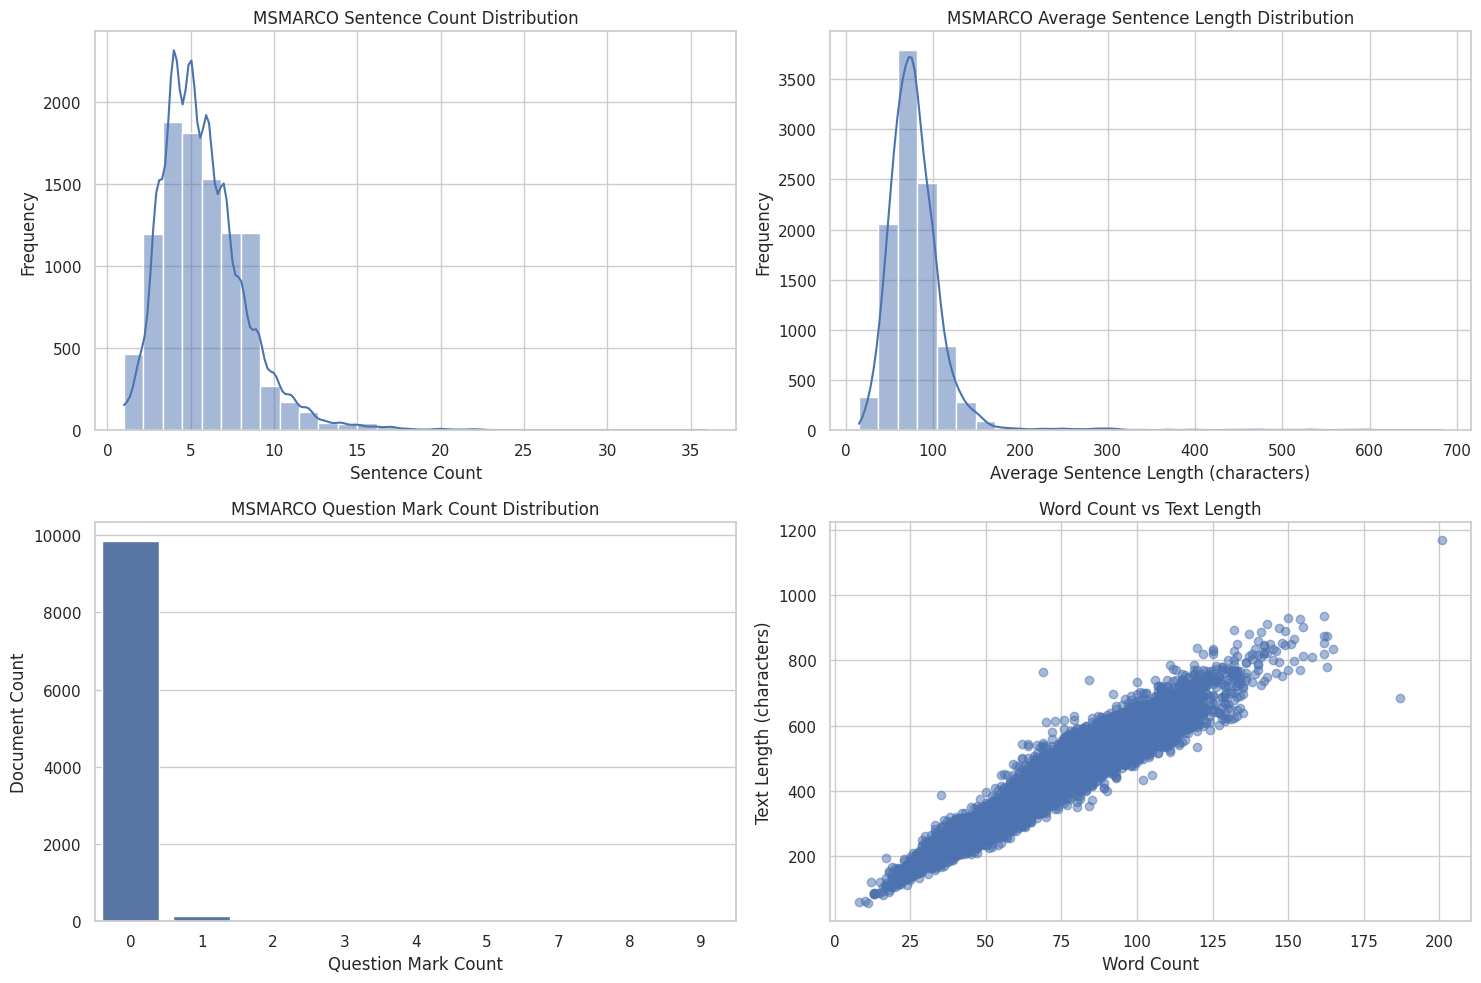

In [7]:
# 7. Explore Text Features
if len(msmarco_df) > 0:
    # Create more text features
    msmarco_df['sentence_count'] = msmarco_df['text'].apply(lambda x: len(x.split('.')) if isinstance(x, str) else 0)
    msmarco_df['question_mark_count'] = msmarco_df['text'].apply(lambda x: x.count('?') if isinstance(x, str) else 0)
    msmarco_df['number_count'] = msmarco_df['text'].apply(lambda x: sum(c.isdigit() for c in x) if isinstance(x, str) else 0)

    # Display statistics
    print("Additional Text Feature Statistics:")
    print(f"Sentence Count Statistics:\n{msmarco_df['sentence_count'].describe()}")
    print(f"\nQuestion Mark Count Statistics:\n{msmarco_df['question_mark_count'].describe()}")
    print(f"\nNumeric Character Statistics:\n{msmarco_df['number_count'].describe()}")

    # Sentence length comparison
    msmarco_df['avg_sentence_length'] = msmarco_df.apply(
        lambda row: row['length'] / row['sentence_count'] if row['sentence_count'] > 0 else 0,
        axis=1
    )

    print(f"\nAverage Sentence Length Statistics:\n{msmarco_df['avg_sentence_length'].describe()}")

    # Visualization
    plt.figure(figsize=(15, 10))

    # Sentence count distribution
    plt.subplot(2, 2, 1)
    sns.histplot(msmarco_df['sentence_count'], bins=30, kde=True)
    plt.title('MSMARCO Sentence Count Distribution')
    plt.xlabel('Sentence Count')
    plt.ylabel('Frequency')

    # Average sentence length distribution
    plt.subplot(2, 2, 2)
    sns.histplot(msmarco_df['avg_sentence_length'], bins=30, kde=True)
    plt.title('MSMARCO Average Sentence Length Distribution')
    plt.xlabel('Average Sentence Length (characters)')
    plt.ylabel('Frequency')

    # Question mark count distribution
    plt.subplot(2, 2, 3)
    sns.countplot(x='question_mark_count', data=msmarco_df[msmarco_df['question_mark_count'] < 10])
    plt.title('MSMARCO Question Mark Count Distribution')
    plt.xlabel('Question Mark Count')
    plt.ylabel('Document Count')

    # Word count vs text length relationship
    plt.subplot(2, 2, 4)
    plt.scatter(msmarco_df['word_count'], msmarco_df['length'], alpha=0.5)
    plt.title('Word Count vs Text Length')
    plt.xlabel('Word Count')
    plt.ylabel('Text Length (characters)')

    plt.tight_layout()
    plt.show()

In [8]:
# 8. Save Processed Data
# Save locally
if len(msmarco_df) > 0:
    msmarco_df.to_csv('/content/msmarco_processed.csv', index=False)
    print("Saved processed dataset to /content/msmarco_processed.csv")

    # Optional: Save to Google Drive
    save_to_drive = False  # Set to True to save to Google Drive
    if save_to_drive:
        drive_data_path = os.path.join(PROJECT_PATH, "data")
        os.makedirs(drive_data_path, exist_ok=True)
        output_path = os.path.join(drive_data_path, "msmarco_processed.csv")
        msmarco_df.to_csv(output_path, index=False)
        print(f"Saved processed dataset to Google Drive: {output_path}")

Saved processed dataset to /content/msmarco_processed.csv


## Conclusion

Through this notebook, we've conducted an in-depth analysis of the MSMARCO v1.1 dataset, including:

1. Text length distribution and basic statistics
2. Word and sentence structure analysis
3. Memory usage optimization suggestions
4. Visualization of various text features

These analyses are valuable for building efficient text retrieval systems and understanding the characteristics of the dataset. Particularly for MSMARCO, which serves as a large-scale information retrieval benchmark, understanding its text length distribution, sentence structure, and vocabulary characteristics is crucial for designing appropriate model architectures and preprocessing strategies.